In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import fit_package as ft
import plot_tools as pt
import analysis_data as ad
import process_data as prc

In [95]:
# f = 'runlist/dark_rate_0DB_processed'
# f = 'runlist/reference_selftrig_0_processed'
# f = 'runlist/reference_selftrig_1_processed'
# f = 'runlist/reference_selftrig_3_processed'
# f = 'runlist/reference_selftrig_4_processed'
# f = 'runlist/reference_selftrig_5_processed'
# f = 'runlist/reference_selftrig_33nf_1p63_12ns_processed'
# f = 'runlist/reference_selftrig_10nf_1p63_12ns_processed'
# f = 'runlist/reference_selftrig_100nf_1p63V_12ns_processed'
# f = 'runlist/reference_selftrig_1uF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_100nF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_33nF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_10nF_1p4V_50ns_processed'

# f = 'runlist/reference_33nF_DarkRate_processed'
# f = 'runlist/reference_33nF_DarkRate_processed_1'

###---------------------------
# f = 'runlist/reference_33nF_1p36V_1us_LED_processed'

# f = 'runlist/reference_1uF_1p36V_1us_LED_processed'
###------------------
# f  = 'runlist/reference_ext_420nm_led_processed'
# f = 'runlist/reference_selftrig_310nm_3p0V_82ns_processed'
# f  = 'runlist/reference_selftrig_310nm_3p0V_82ns_BP395_processed'
# f = 'runlist/reference_selftrig_254nm_2p8V_82ns_SP395_processed'

####----------------------------
# f = 'runlist/reference_selftrig_3p0V_82ns_310nm_processed'
# f = 'runlist/reference_selftrig_2p8V_53ns_254nm_processed'
# f = 'runlist/reference_ext_420nm_1p36_36ns_processed'



#--------------
# f = 'runlist/reference_ext_254nm_2p8V_53ns_SP395_shortpass_processed'
#### f = 'runlist/reference_ext_310nm_ref_processed'
# f = 'runlist/reference_ext_254nm_ref_processed'
#---------------------------------



###BP395 420nm reference---------
# f = 'runlist/reference_ext_420nm_SP395_ref_processed'
##BP395 420nm filter-----------------------
# f= 'runlist/reference_ext_420nm_SP395_processed'


##### BP200 filter ----------------------------------
# f = 'runlist/reference_ext_420nm_BP200_processed'
#### f = 'runlist/reference_ext_310nm_BP200_processed'
# f=  'runlist/reference_ext_254nm_BP200_processed'

#### BP200 reference
# f = 'runlist/reference_ext_420nm_ref_1_processed'
####f = 'runlist/reference_ext_310nm_ref_1_processed'
# f = 'runlist/reference_ext_254nm_BP220_ref_processed'

##310 rerun------------------------------
# f = 'runlist/reference_ext_310nm_BP200_ref_processed'
# f = 'runlist/reference_ext_310nm_BP200_rerun_processed'
# f = 'runlist/reference_ext_310nm_SP395_ref_processed'
# f = 'runlist/reference_ext_310nm_SP395_rerun_processed'
#------------------------
# 254 SP395 rerun check
# f = 'runlist/reference_ext_254nm_SP395_ref_rerun_processed'
# f = 'runlist/reference_ext_254nm_SP395_rerun_processed'

# f = 'runlist/darkrate_veiw_processed'
#--------------
# f  = 'runlist/tpc_4pmt_darkrate_processed'
# f = 'runlist/tpc_4pmt_led_1_processed'
# f = 'runlist/tpc_4pmt_led_fiber_processed'
# f  = 'runlist/tpc_4pmt_led_processed'

# f = 'runlist/tpc_4pmt_led_2_processed'

# f = 'runlist/tpc_4pmt_led_3_processed'
# f  = 'runlist/tpc_4pmt_led_4_processed'
# f  = 'runlist/tpc_4pmt_darkrate_round4_processed'
# f = 'runlist/tpc_4pmt_led_fiber_r1_processed'
# f  ='runlist/tpc_4pmt_led_fiber_r2_processed'
#-----------------------
# f  = 'runlist/tpc_4pmt_fiberin_run0_processed'

# f  = 'runlist/tpc_4pmt_fiberin_run1_processed'
# f ='runlist/tpc_4pmt_fiberin_run2_processed'
# f = 'runlist/tpc_4pmt_fiberin_750V_run1_processed'
# f  = 'runlist/tpc_4pmt_fiberin_750_run3_processed'
# f  ='runlist/tpc_4pmt_fiberin_800V_processed'
# f  =  'runlist/tpc_4pmt_fiberin_750_run4_processed'

# f  = 'runlist/tpc_1pmt_darkrate_20250626_processed'
# f = 'runlist/tpc_2pmt_led_20250626_processed'
# f = 'runlist/tpc_4pmt_darkrate_round2_processed'
# f = 'runlist/tpc_4pmt_darkrate_800V_run0_processed'
# f = 'runlist/tpc_4pmt_darkrate_800V_run9_processed'
# f  =  'runlist/tpc_4pmt_led_self_trig_800adc_processed'

# f = 'runlist/anode_dy7_gain_ratio_processed'

# ff = 'runlist/anode_dy7_gain_ratio_fit_linear'
# flist = ad.read_file_names(f)
# df = ad.merge_files(flist)

# files = ad.read_file_names(ff)
# dff = ad.merge_files(files)
# df.head()
# f = 'outnpy/tpc_2pmt_20250708_anode_dy7_ratio_temp_2220K_LED_5p0V_1kHz_6DB_run1_raw_b0_seg0_single_gussain.h5py'

f =  'runlist/wf_LED1p58V_processed'
flist = ad.read_file_names(f)
df = ad.merge_files(flist)
df.head()
# f1ms =  'runlist/timeconstant_wf_10ms'
# flist1ms = ad.read_file_names(f1ms)
# df1ms = ad.merge_files(flist1ms)
# df1ms=df1ms[df1ms.Ch ==0]
# df1ms.head(3)

/mnt/data/outnpy/lv2414_9DB_lv2415_0DB_combine_20250122_1p58v_calibration_1kHz_resistor_62p5M_run0_raw_b0_seg0.h5py


,Ch,TTT,Baseline,Hight,Wave
0,0,39180,15170,11015,"[15169, 15168, 15170, 15165, 15171, 15172, 151..."
1,1,39180,15322,6636,"[15322, 15324, 15327, 15319, 15323, 15326, 153..."
2,2,39180,8112,8,"[8113, 8111, 8114, 8112, 8116, 8114, 8111, 811..."
3,1,289180,15322,6428,"[15317, 15321, 15323, 15323, 15325, 15321, 153..."
4,2,289180,8112,14,"[8110, 8113, 8108, 8112, 8112, 8110, 8113, 811..."


In [96]:
# f =  'runlist/wf_LED1p58V_processed'
# flist = ad.read_file_names(f)
# df = ad.merge_files(flist)

df_0 = df[df.Ch ==0]
df_1 = df[df.Ch ==1]
df_2 = df[df.Ch ==2]
len(df_0), len(df_1), len(df_2)

(114587, 114587, 114587)

In [115]:
df_2

,Ch,TTT,Baseline,Hight,Wave
2,2,39180,8112,8,"[8113, 8111, 8114, 8112, 8116, 8114, 8111, 811..."
4,2,289180,8112,14,"[8110, 8113, 8108, 8112, 8112, 8110, 8113, 811..."
6,2,539180,8111,12,"[8115, 8114, 8112, 8109, 8113, 8106, 8110, 811..."
11,2,789176,8112,15,"[8117, 8114, 8114, 8114, 8112, 8113, 8112, 811..."
14,2,1039176,8112,15,"[8113, 8111, 8111, 8108, 8111, 8112, 8111, 811..."
...,...,...,...,...,...
343748,2,28645361572,8111,14,"[8114, 8106, 8111, 8113, 8111, 8109, 8108, 810..."
343751,2,28645611568,8111,12,"[8108, 8113, 8113, 8113, 8113, 8113, 8112, 811..."
343754,2,28645861568,8111,13,"[8111, 8109, 8113, 8110, 8111, 8110, 8110, 811..."
343756,2,28646111564,8111,10,"[8115, 8112, 8109, 8111, 8110, 8111, 8114, 811..."


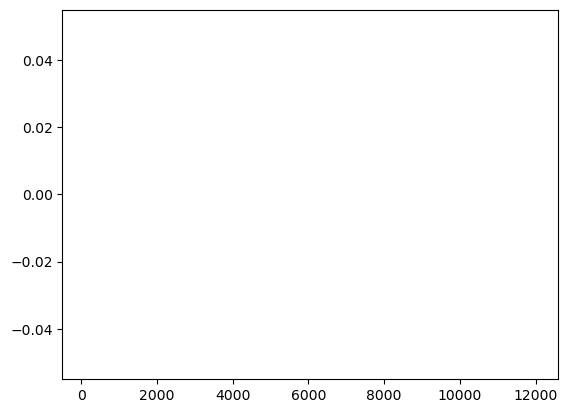

In [114]:
plt.hist(-df_2.Hight, bins=100, range=(100, 12000), )
plt.show()

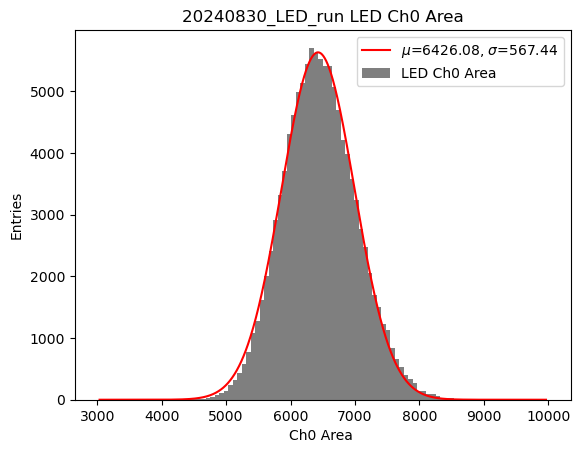

Fit: mu= 6426.08, sigma =567.44


In [109]:
mu, sigma =ad.plot_fit_histgram_vs_Gaussion(- df_1.Hight, 100, 3.E3, 1.E4, [2E4, 5E3, 1.E3])

In [ ]:
mu, sigma =ad.plot_fit_histgram_vs_Gaussion(df.Hight, 100, 1.E4, 1.2E4, [2E4, 1.1E4, 1.E3])

In [127]:
11032.91 *0.122 * 2.76, 6426.08* 0.122, 4300* 0.122

(3715.0014552, 783.98176, 524.6)

In [120]:
wf_anode, wf_anode_err = pt.mean_waveforms(np.stack(df_0.Wave.to_numpy()) , 0, 250)
wf_mintor, wf_mintor_err = pt.mean_waveforms(np.stack(df_1.Wave.to_numpy()) , 0, 250)
wf_dynode, wf_dynode_err = pt.mean_waveforms(np.stack(df_2.Wave.to_numpy()) , 0, 250)

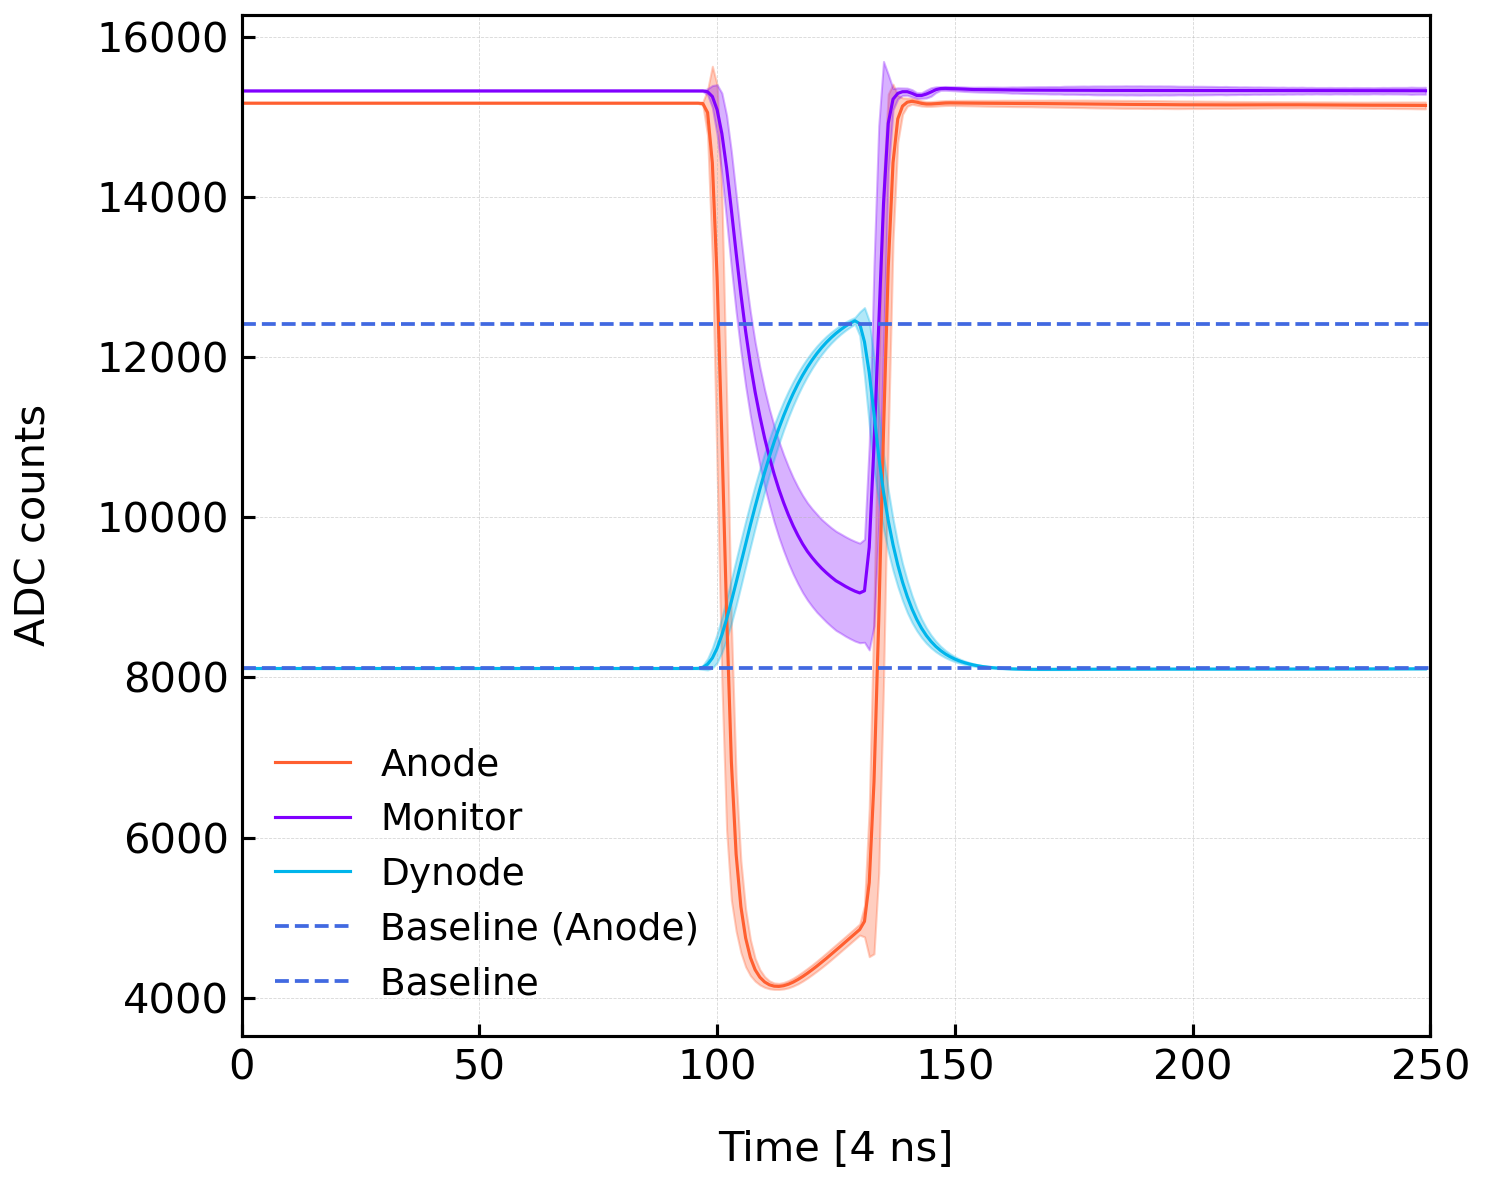

In [126]:


baseline = df_2.Baseline[2]
plt.figure(figsize=(10, 8),dpi=150)

pt.plot_waveform(wf_anode, wf_anode_err, 7, 'Anode')
pt.plot_waveform(wf_mintor, wf_mintor_err, 0, 'Monitor')
pt.plot_waveform(wf_dynode, wf_dynode_err, 2, 'Dynode')

plt.axhline(y=baseline, color='royalblue', linestyle='--',linewidth=1.8, label='Baseline (Anode)')  
plt.axhline(y=(baseline + 4300), color='royalblue', linestyle='--',linewidth=1.8, label='Baseline ')  

plt.legend(loc='lower left',fontsize=18,shadow=False, frameon=False, fancybox=False, framealpha=0.8, ncol=1)
plt.xlabel('Time [4 ns]',labelpad=20, fontsize=20)
plt.ylabel("ADC counts", labelpad=20, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(which='both', direction='in', length=6, width=1.5, pad=6)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
plt.xlim(0, 250)
# plt.savefig('figs/wfadm.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show() 

In [78]:
df1ms.head(3)

,Ch,TTT,Baseline,STD,Area,Hight,Width,Asys,st,ed,md,WLen,RFOvhight,RunType,Ftag,Wave
0,0,3355408,15171,2.828427,310.607910,2672,14,0.987864,274,288,281,400,2124,DarkRate,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,"[15170, 15175, 15170, 15172, 15172, 15171, 151..."
3,0,8355380,15171,2.271563,347.839355,2609,14,0.988962,335,349,342,400,-28,DarkRate,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,"[15173, 15173, 15172, 15173, 15174, 15169, 151..."
6,0,13355348,15173,1.857418,361.267090,2684,14,0.988428,211,225,218,400,2047,DarkRate,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,"[15170, 15171, 15173, 15172, 15171, 15170, 151..."


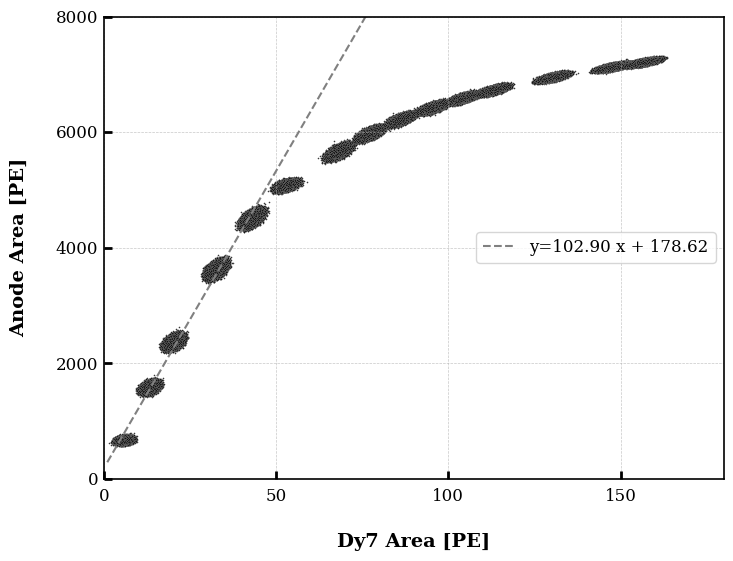

In [38]:

plt.figure(figsize=(8, 6))
plt.rcParams.update(params)

# 绘制散点图，点大小适中，颜色深，边缘颜色更柔和
plt.scatter(
    -df_5.Area / 6.23,
    df_1.Area / 6.23,
    s=1,                      # 点大小，适中
    c='black',                 # 点颜色
    alpha=0.8,                 # 透明度，稍微透明避免重叠太浓
    edgecolors='gray',         # 点边缘颜色
    linewidths=0.2,            # 边缘线宽，细一点
    marker='o'                 # 点形状，圆形
)
plt.plot(x, y_fit, color='grey', linestyle='--',  linewidth=1.5, label=f'y={coeffs[0]:.2f} x + {coeffs[1]:.2f}')

# 设置坐标轴标签，字体大小加粗
plt.xlabel('Dy7 Area [PE]', fontsize=14, fontweight='bold')
plt.ylabel('Anode Area [PE]', fontsize=14, fontweight='bold')

# 设置坐标轴刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 添加网格，颜色浅，线型细
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 可选：添加标题，字体大小加粗
# plt.title('Scatter Plot of Dy7 vs Anode Area', fontsize=16, fontweight='bold')

# 优化图形边框线宽
plt.gca().spines['top'].set_linewidth(1.2)
plt.gca().spines['right'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

plt.tick_params(which='both', direction='in')
plt.tick_params(which='major', length=6)

plt.legend(loc='center right', fontsize=12)
plt.xlim(0, 180)
plt.ylim(0, 8000)
plt.savefig('figs/adratiot.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figs/adratiot.png', dpi=300, bbox_inches='tight')

plt.show()


In [120]:
import pandas as pd
import numpy as np

In [ ]:
# f = 'runlist/led_fitted'
# f = 'runlist/led_fitted_BP395'
# f = 'runlist/led_fitted_BP200'
###---------------------
# f = 'runlist/led_BP395_rerun'
f = 'runlist/led_BP200_rerun'
##--------------
# f = 'runlist/led_SP395_rerun'
# f = 'runlist/led_SP395_rerun'

flist = ad.read_file_names(f)
df_f = ad.merge_files(flist)
df_f[:]

In [46]:
ftag = f.split('/')[1]
ftag

'led_SP395_rerun'

In [47]:
area_ratio, area_ratio_err = ad.Area_ratio(df_f)

3.0667717294217045 1.0170636878254642
48.6421927932952 4.026628067363483
3.313123265060844 1.4560934996866743


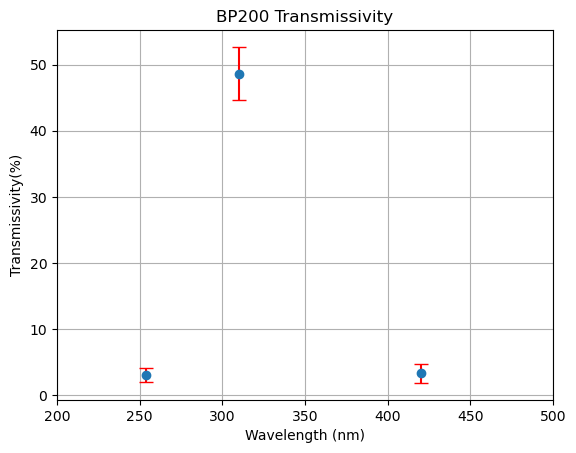

In [49]:
import matplotlib.pyplot as plt
import pickle

# 数据
fig, ax = plt.subplots()
wavelengths = [254, 310, 420]  # 波长，单位nm
plt.errorbar(wavelengths, area_ratio, yerr=area_ratio_err, fmt='o', capsize=5, capthick=1, ecolor='red')
# with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'wb') as f:
    # pickle.dump(fig, f)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')
plt.title('BP200 Transmissivity')
plt.grid(True)
plt.xlim(200,500)
# plt.ylim(-5,15)
# plt.savefig(r'figs/{}_transmissivity.png'.format(ftag))
plt.show()

(200.0, 500.0)

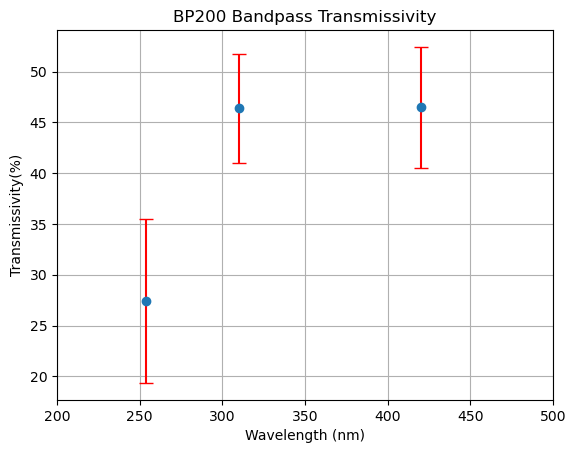

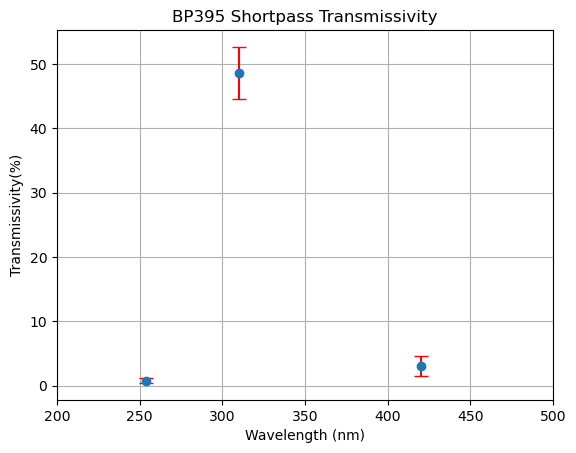

In [244]:
import matplotlib.pyplot as plt
import pickle

# 数据
# fig, ax = plt.subplots()
wavelengths = [254, 310, 420]  # 波长，单位nm
with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'rb') as f:
    bp200= pickle.load(f)
plt.grid(True)
plt.xlim(200,500)
plt.title('BP200 Bandpass Transmissivity')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')

with open('figs/BP395_shortpass_transmissivity_ref.pkl', 'rb') as f:
    bp395 = pickle.load(f)

# with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'rb') as f:
    # loaded_fig = pickle.load(f)
# loaded_fig.show()

plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')
plt.title('BP395 Shortpass Transmissivity')
plt.grid(True)
plt.xlim(200,500)
# plt.ylim(-10,100)
# # plt.savefig('figs/BP395_shortpass_transmissivity.png')
# plt.show()

In [162]:
params = {
    'font.family': 'serif',
    'font.size' : 24, 'axes.titlesize' : 42, 'axes.labelsize' : 32, 'axes.linewidth' : 2,
    # ticks
    'xtick.labelsize' : 24, 'ytick.labelsize' : 24, 'xtick.major.size' : 18, 'xtick.minor.size' : 8,
    'ytick.major.size' : 18, 'ytick.minor.size' : 8, 'xtick.major.width' : 2, 'xtick.minor.width' : 2,
    'ytick.major.width' : 2, 'ytick.minor.width' : 2, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 8, 'lines.markeredgewidth' : 2, 'errorbar.capsize' : 5, 'lines.linewidth' : 2,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 24,
    'axes.labelsize': 30, 'axes.titlesize':24, 'xtick.labelsize':24, 'ytick.labelsize':24,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':20,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}


/tmp/ipykernel_2116131/64871234.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(-1.E4,3.E3)


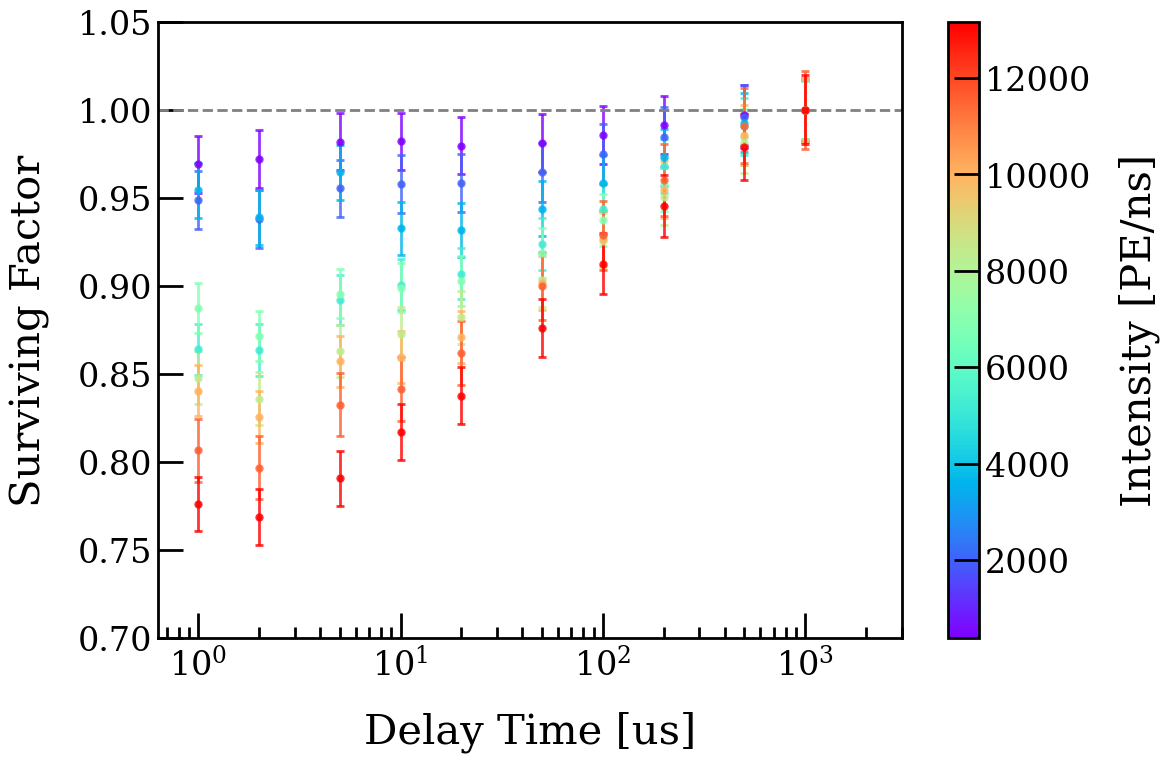

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib import cm


def plot_ratio(file, intensity, color):
    df = pd.read_hdf(file, key='winfo')
    ax.errorbar(df.Delta_t, df.R2ref, yerr=df.R2ref_err, fmt='.', color=color,
                alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2,
                label='')


fig, ax = plt.subplots(figsize=(12,8)) 
plt.rcParams.update(params)
plt.rcParams['text.usetex'] = False

voltage_map = {'3p5v_1p75v':13166, '3p25v_1p625v':11568, '3v_1p5v':9970, '2p75v_1p375v':8372,
               '2p5v_1p25v':6774, '2p25v_1p125v':5176, '2v_1v':3578, '1p75v_875mv':1980, '1p5v_750mv':382}

# 假设已有数据
delay_times = np.logspace(0, 4, 10)  # 延迟时间
intensities = np.array([382, 1980, 3578, 5176, 6774, 8372, 9970, 11568, 13166])

# 归一化光强
norm = mcolors.Normalize(vmin=intensities.min(), vmax=intensities.max())
# cmap = plt.cm.viridis
cmap = plt.cm.rainbow

flist = 'runlist/scale_file_list_correction_scaled_corrected_1us'
# i = 0
with open(flist,  'r') as list:
    for line in list: 
        file = line.rstrip('\n')
        voltage= file.split('combine_')[1].split('_1p36v_')[0]
        intensity = voltage_map.get(voltage)
        color = cmap(norm(intensity))
        plot_ratio(file, intensity, color)
        
        
# 添加colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Intensity [PE/ns]')

# 设置colorbar刻度为科学计数法
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1,1))  # 例如：当数值 <0.1 或 >10时用科学计数法
cbar.ax.yaxis.set_major_formatter(formatter)
cbar.update_ticks()

ax.set_xlabel('Delay Time [us]')
ax.set_ylabel('Surviving Factor')   
ax.axhline(y=1.0, color='grey', linestyle='--', label='')
# ax.set_title(title)
ax.set_xscale('log')
ax.set_ylim(0.70,1.05)
# ax.set_xlim(-1.E3,1.5E3)
ax.set_xlim(-1.E4,3.E3)
plt.savefig('figs/surviving_factor.pdf',dpi=300)
plt.show()